In [167]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collecting
- For data collection im using "Yahoo Finance" from  "pandas_datareader" module link-(https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo)
- Stock data collected from Zomato.NS company link-(https://finance.yahoo.com/quote/ZOMATO.NS?p=ZOMATO.NS&.tsrc=fin-srch)

In [ ]:
# df = web.DataReader('ZOMATO.NS', 'yahoo', start='2019-09-10', end='2019-10-09')

In above line wanted to take data from 2019 to till today but for zomato its avalable only from 2021-07-23 

In [ ]:
# df.to_csv('/content/ZOMATO_NS.csv')

In [118]:
data=pd.read_csv('ZOMATO_NS.csv')
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-07-23,138.899994,115.000000,116.000000,126.000000,694895290,126.000000
1,2021-07-26,143.750000,125.300003,126.349998,140.649994,249723854,140.649994
2,2021-07-27,147.800003,127.750000,141.699997,132.899994,240341900,132.899994
3,2021-07-28,135.000000,123.550003,131.000000,131.199997,159793731,131.199997
4,2021-07-29,144.000000,132.199997,134.949997,141.550003,117973089,141.550003


#EDA (Exploratory Data Analysis)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       235 non-null    object 
 1   High       235 non-null    float64
 2   Low        235 non-null    float64
 3   Open       235 non-null    float64
 4   Close      235 non-null    float64
 5   Volume     235 non-null    int64  
 6   Adj Close  235 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.0+ KB


In [121]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,235.000000,235.000000,235.000000,235.000000,2.350000e+02,235.000000
mean,111.878936,106.311915,109.463191,108.810426,4.172116e+07,108.810426
std,33.045745,31.725247,32.502729,32.465246,6.001811e+07,32.465246
min,53.900002,50.049999,52.000000,51.950001,4.101820e+06,51.950001
25%,81.549999,78.549999,80.275002,79.774998,1.376007e+07,79.774998
50%,131.449997,124.349998,127.849998,126.550003,2.379859e+07,126.550003
75%,139.750000,133.775002,137.525002,137.325005,4.221184e+07,137.325005
max,169.000000,154.250000,161.149994,160.300003,6.948953e+08,160.300003


In [127]:
data.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [130]:
data.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

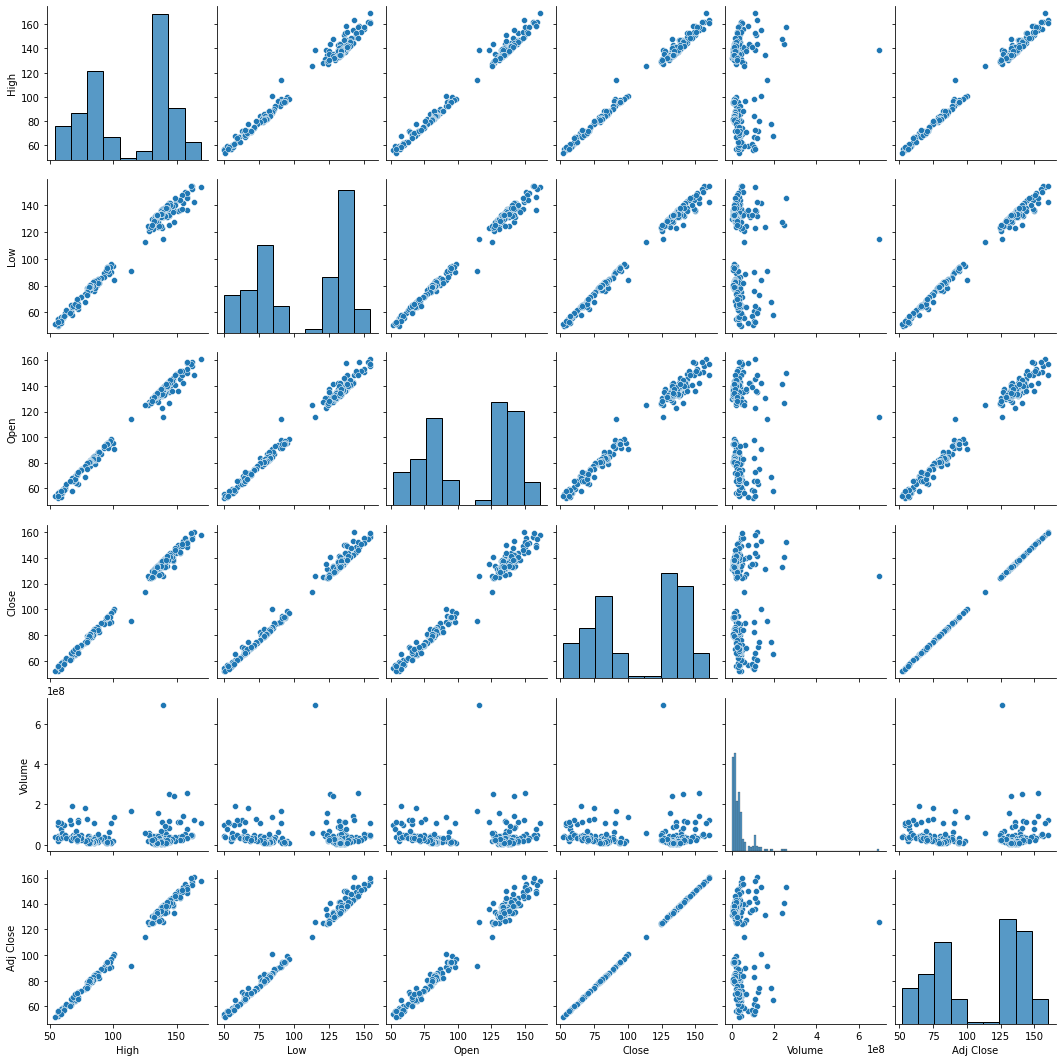

In [153]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
sns.pairplot(data)

In [145]:
data.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [5]:
# im taking 'Close' for my future prediction
data1=data.reset_index()['Close']

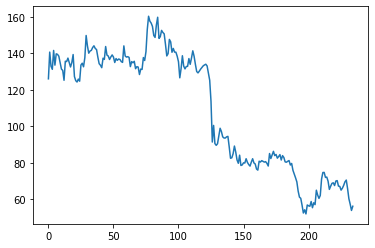

In [6]:
import matplotlib.pyplot as plt
plt.plot(data1)

LSTM are sencitive to scale of the data. so we apply mimnax scalar

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
data1=scalar.fit_transform(np.array(data1).reshape(-1,1))

In [8]:
data1.shape

(235, 1)

In [18]:
training_size=int(len(data1)*0.65)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [31]:
print(test_data,train_data)

[[0.27918778]
 [0.26072908]
 [0.24965389]
 [0.24180895]
 [0.26211349]
 [0.27918778]
 [0.25796032]
 [0.25242272]
 [0.22704201]
 [0.22150434]
 [0.26672817]
 [0.26257499]
 [0.269497  ]
 [0.26580525]
 [0.26211349]
 [0.26442083]
 [0.25565298]
 [0.24227038]
 [0.30549148]
 [0.28011077]
 [0.29856947]
 [0.31656667]
 [0.29487771]
 [0.3008768 ]
 [0.28195661]
 [0.29026304]
 [0.29995381]
 [0.27272726]
 [0.29487771]
 [0.28564836]
 [0.26303642]
 [0.26165207]
 [0.26626674]
 [0.26995843]
 [0.24734655]
 [0.25519148]
 [0.22058142]
 [0.20212272]
 [0.18274111]
 [0.16197507]
 [0.11536683]
 [0.08491002]
 [0.07891093]
 [0.04430087]
 [0.00461467]
 [0.02076604]
 [0.        ]
 [0.04522379]
 [0.04107061]
 [0.03876327]
 [0.06275957]
 [0.03137977]
 [0.05629902]
 [0.04706967]
 [0.1199815 ]
 [0.09552375]
 [0.07844947]
 [0.09321641]
 [0.17628059]
 [0.20950623]
 [0.20996766]
 [0.18458695]
 [0.18643286]
 [0.16566682]
 [0.12413475]
 [0.14028611]
 [0.15459156]
 [0.1573604 ]
 [0.14351637]
 [0.16658974]
 [0.16843559]
 [0.14

In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0] #i=0  0,1,2,3,4,------99,100
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [32]:
#reshape into X=t,t+1,t+2,t+3 and t+4
time_step=70
X_train,y_train =create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)


In [33]:
print(X_train.shape), print(y_train.shape)

(81, 70)
(81,)


(None, None)

In [34]:
print(X_test.shape),print(y_test.shape)

(12, 70)
(12,)


(None, None)

In [35]:
#For LSTM we have to reshape input to be [samples, time steps, features] which is required
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [36]:
## create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(70,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 70, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 70, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
2/2 [==============================] - 7s 1s/step - loss: 0.4892 - val_loss: 0.0056
Epoch 2/100
2/2 [==============================] - 0s 120ms/step - loss: 0.2617 - val_loss: 0.0025
Epoch 3/100
2/2 [==============================] - 0s 123ms/step - loss: 0.0948 - val_loss: 0.0160
Epoch 4/100
2/2 [==============================] - 0s 116ms/step - loss: 0.0326 - val_loss: 0.0403
Epoch 5/100
2/2 [==============================] - 0s 129ms/step - loss: 0.0902 - val_loss: 0.0304
Epoch 6/100
2/2 [==============================] - 0s 121ms/step - loss: 0.0476 - val_loss: 0.0162
Epoch 7/100
2/2 [==============================] - 0s 117ms/step - loss: 0.0240 - val_loss: 0.0096
Epoch 8/100
2/2 [==============================] - 0s 122ms/step - loss: 0.0347 - val_loss: 0.0079
Epoch 9/100
2/2 [==============================] - 0s 123ms/step - loss: 0.0415 - val_loss: 0.0092
Epoch 10/100
2/2 [==============================] - 0s 118ms/step - loss: 0.0358 - val_loss: 0.0132
Epoch 11/100

In [65]:
import tensorflow as tf

In [66]:
# Now we do predition and check performance matrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [67]:
#transformback to orignal form
train_predict=scalar.inverse_transform(train_predict)
test_predict=scalar.inverse_transform(test_predict)

In [68]:
# calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
# Train RMSE
math.sqrt(mean_squared_error(y_train,train_predict))

125.91270384661827

In [69]:
#Test RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

65.36768692064922

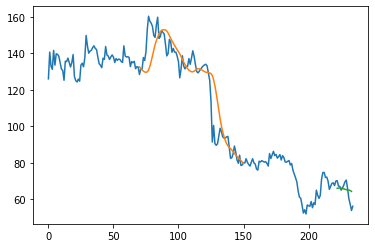

In [72]:
### Plotting 
# shift train predictions for plotting
look_back=70
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

##Observatin
- The Orange line for train data output
- The Green line is for test data output


#Now lets predict future 30 days output

In [73]:
len(test_data)

83

In [105]:
# in this im taking '3:' because my test size is 83 so i want to predict next value with 70 refrence
x_input=test_data[13:].reshape(1,-1) # 83-13 = 70
x_input.shape

(1, 70)

In [106]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [107]:
temp_input

[0.2658052480727329,
 0.2621134943355003,
 0.26442083161947755,
 0.2556529781061027,
 0.2422703796104277,
 0.30549147752287825,
 0.2801107673991296,
 0.29856946567094683,
 0.3165666683202302,
 0.2948777119337142,
 0.30087680295492397,
 0.281956609060573,
 0.2902630373657599,
 0.2999538117098564,
 0.27272725992466434,
 0.2948777119337142,
 0.28564836279780564,
 0.26303641516622206,
 0.26165206912731237,
 0.26626674369526676,
 0.2699584270181535,
 0.2473465498009158,
 0.2551914824835689,
 0.22058142322391167,
 0.20212272495209443,
 0.18274110584955555,
 0.1619750702937613,
 0.11536682899168454,
 0.08491001909179369,
 0.07891092807058392,
 0.04430086881092671,
 0.00461467456795428,
 0.020766035555794315,
 0.0,
 0.04522378964164836,
 0.041070610696227805,
 0.038763273412250665,
 0.06275956708274383,
 0.03137976593778541,
 0.05629901564617329,
 0.04706966651026473,
 0.11998150355963882,
 0.09552374947378478,
 0.07844946765522304,
 0.09321641218980764,
 0.17628058962015786,
 0.20950623242655

In [108]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=70
i=0
while(i<30):
    
    if(len(temp_input)>70):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.09855837]
71
1 day input [0.26211349 0.26442083 0.25565298 0.24227038 0.30549148 0.28011077
 0.29856947 0.31656667 0.29487771 0.3008768  0.28195661 0.29026304
 0.29995381 0.27272726 0.29487771 0.28564836 0.26303642 0.26165207
 0.26626674 0.26995843 0.24734655 0.25519148 0.22058142 0.20212272
 0.18274111 0.16197507 0.11536683 0.08491002 0.07891093 0.04430087
 0.00461467 0.02076604 0.         0.04522379 0.04107061 0.03876327
 0.06275957 0.03137977 0.05629902 0.04706967 0.1199815  0.09552375
 0.07844947 0.09321641 0.17628059 0.20950623 0.20996766 0.18458695
 0.18643286 0.16566682 0.12413475 0.14028611 0.15459156 0.1573604
 0.14351637 0.16658974 0.16843559 0.14074754 0.13936319 0.120443
 0.13013384 0.14443929 0.16243657 0.17120442 0.12828793 0.07706505
 0.049377   0.01753574 0.03876327 0.09855837]
1 day output [[0.08987468]]
2 day input [0.26442083 0.25565298 0.24227038 0.30549148 0.28011077 0.29856947
 0.31656667 0.29487771 0.3008768  0.28195661 0.29026304 0.29995381
 0.27272726 0.2948

In [109]:
day_new=np.arange(1,71)
day_pred=np.arange(71,101)

In [110]:
import matplotlib.pyplot as plt

In [111]:
len(data1)

235

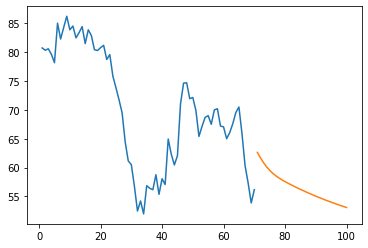

In [112]:
# The next 30 days prediction we can see in orange color
plt.plot(day_new,scalar.inverse_transform(data1[165:]))
plt.plot(day_pred,scalar.inverse_transform(lst_output))

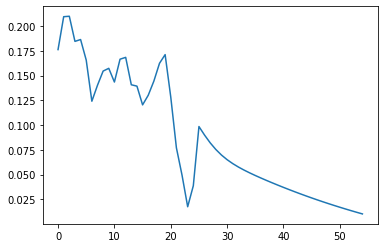

In [113]:
# When we combine prediction value with Present it look like this
data2=data1.tolist()
data2.extend(lst_output)
plt.plot(data2[210:])

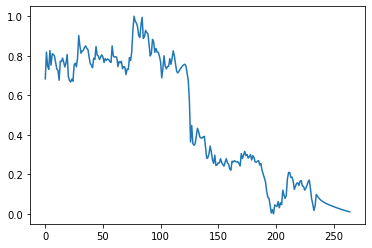

In [114]:
plt.plot(data2)